<a href="https://colab.research.google.com/github/JoDeMiro/Ember/blob/main/Fuzzy_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# https://www.youtube.com/watch?v=qUQf1JxnTnY

## Scikit-Fuzzy Demo

### Procedure
In this demo we're going to translate a conceptual example, predicting expected custormer in an ice cream shop given a particular outside temperature. This example moder flrom Fuyy Logi in Decision Making and Signal Processing by Pant and Holbert

Recall fuzzy siystems consist of:
- if premise(anicenment) then conclusion (consequent)

Consider an ice cream panor with a non-computer iterate propreator. He tells you:
- if themerature is hot then ice cream panor is crowded.
- if tempereature is moderate thaen ice cream parto is bussy.
- if tempereature is <b>cool</b> then ice cream partor is quite.

For this system we have two universe varianbles: temp and n_customers

Note how pythonic, simple, and intuitive this systa is!


In [ ]:
%%capture
!pip install scikit-fuzzy

In [ ]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt

## Describe Fuzzy System

First creates fuzzy membership function whichh represent change of thruth related to a continous variable.

In [ ]:
# Generata universe functions
temperature = np.arange(30, 101, 1)
customers   = np.arange(0, 36, 1)

print(temperature)

[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100]


In [ ]:
# Membership function for heat

temperature_hot      = fuzz.trimf(temperature, [65, 100, 100])
temperature_moderate = fuzz.trimf(temperature, [30, 65, 100])
temperature_cool     = fuzz.trapmf(temperature, [20, 20, 30, 65])

# Membership functions for customers

customers_crowded   = fuzz.trimf(customers, [24, 35, 35])
customers_busy      = fuzz.trimf(customers, [0, 24, 35])
customers_quiet     = fuzz.trimf(customers, [0, 0, 24])

**Note** in sckit-fuzzy all membership functions are raw NumPy arrays. This means in many functions you must manually specifiy both the universe variable (here temperature) and the membership function. The universe variable and membership functions arrays must have identical shape.

## Visualize Fuzzy System

(-0.05, 1.05)

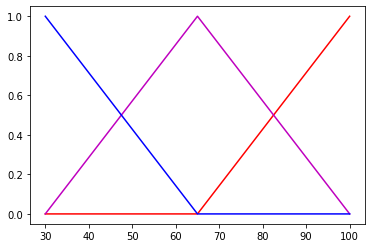

In [ ]:
# Vizualize membership function for temperature
fig, ax = plt.subplots()

ax.plot(temperature, temperature_hot, 'r', temperature, temperature_moderate, 'm', temperature, temperature_cool, 'b')
ax.set_ylabel = ('Fuzzy membership')
ax.set_xlabel = ('Temp (Farenheit)')
ax.set_ylim(-0.05, 1.05)

(-0.05, 1.05)

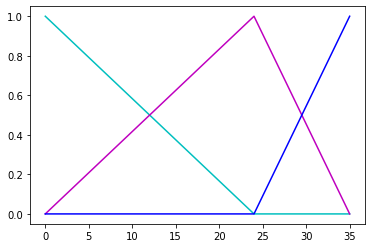

In [ ]:
# Vizualize membership function for customers
fig, ax = plt.subplots()

ax.plot(customers, customers_quiet, 'c', customers, customers_busy, 'm', customers, customers_crowded, 'b')
ax.set_ylabel = ('Fuzzy membership')
ax.set_xlabel = ('Customers (n)')
ax.set_ylim(-0.05, 1.05)

Next, we use fuzzy impication via the Product relation. This is doen separately for each statment in the fuzzy system, so we will hamve 3 separate fuzzy matrices

In [ ]:
# Fuzzy relation
rule1 = fuzz.relation_product(temperature_hot, customers_crowded)
rule2 = fuzz.relation_product(temperature_moderate, customers_busy)
rule3 = fuzz.relation_product(temperature_cool, customers_quiet)

# Combine fuzzy relations into aggregate relation
rule_combined = np.fmax(rule1, np.fmax(rule2, rule2))

In [ ]:
rule_combined[1,1]
rule_combined[30,20]

0.7142857142857143

Visualize

Text(0.5, 0, 'Customers')

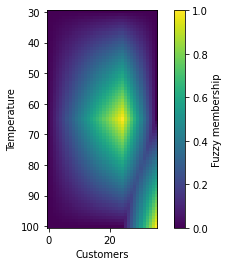

In [ ]:
plt.imshow(rule_combined)
cbar = plt.colorbar()
cbar.set_label('Fuzzy membership')
plt.yticks([i * 10 for i in range(8)], [str( i * 10 + 30) for i in range(8)])
plt.ylabel('Temperature')
plt.xlabel('Customers')

## Defuzzification

The fuzzy relation metirces show how the system responds for all temperatures and all customers. But we need to make a specific prediction for a specific temperature. We need to return from the fuzzy domain back to crisp logic. <b>This know as defuzzification.</b>

In [ ]:
print(customers.shape)
print(rule_combined.shape)
print(predicted_customers.shape)
print(rule_combined[1,:].shape)

(36,)
(71, 36)
(71,)
(36,)


In [ ]:
fuzz.defuzz(customers, rule_combined[1,:], 'centroid')

fuzz.defuzz(customers, rule_combined[60,:], 'centroid')

24.239401496259347

In [ ]:
# Defuzzify to generate scisp solution

predicted_customers = np.zeros_like(temperature)

for i in range(len(predicted_customers) - 1):
  i = i + 1
  predicted_customers[i] = fuzz.defuzz(customers, rule_combined[i,:], mode = 'centroid')

In [ ]:
predicted_customers

array([ 0, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
       19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20,
       21, 21, 21, 21, 22, 22, 22, 23, 23, 24, 24, 25, 25, 26, 27, 27, 28,
       29, 30, 31])

## Results

Explanation: https://youtu.be/qUQf1JxnTnY?t=600

Text(0, 0.5, 'Customers')

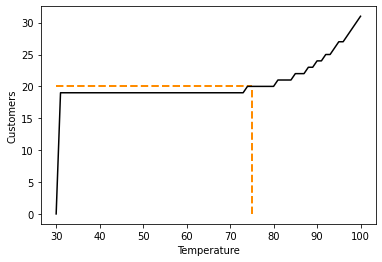

In [ ]:
# Member of cutomers on our hypothetical Farenheit degrees day

plt.plot(temperature, predicted_customers, 'k')
plt.vlines(75, 0, predicted_customers[temperature == 75], color='DarkOrange', linestyles='dashed', lw = 2)
plt.hlines(predicted_customers[temperature == 75], 30, 75, color = 'DarkOrange', linestyles='dashed', lw=2)
plt.xlabel('Temperature')
plt.ylabel('Customers')

Text(0, 0.5, 'Customers')

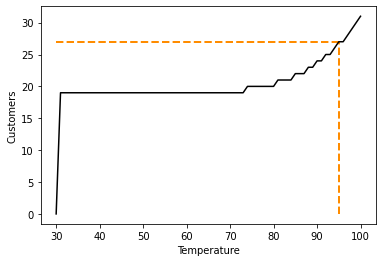

In [ ]:
# Member of cutomers on our hypothetical Farenheit degrees day

plt.plot(temperature, predicted_customers, 'k')
plt.vlines(95, 0, predicted_customers[temperature == 95], color='DarkOrange', linestyles='dashed', lw = 2)
plt.hlines(predicted_customers[temperature == 95], 30, 95, color = 'DarkOrange', linestyles='dashed', lw=2)
plt.xlabel('Temperature')
plt.ylabel('Customers')